In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import json

In [20]:
data = {
	'age': {
		'5-9': 0.1,
		'15-19': 0.01,
		'30-35': 0.2,
		'70+': 0.1
	},
	'sex': {
		'm': 0.1,
		'f': 0.2
	},
	'poi': {
		'churches': 0.1,
		'univeristy': 0.9,
		'shop': 0.2,
		'pub': 0.1
	},
	'localization_type': {
		'city': 0.1,
		'town': 0.2
	}
}
long_data = []

# Iterating over the original data dictionary to flatten it into long-form
for category, subcategories in data.items():
	for subcategory, value in subcategories.items():
		long_data.append([category, subcategory, value])

# Create a DataFrame
df_long = pd.DataFrame(long_data, columns=['category', 'subcategory', 'value'])
df_long

,category,subcategory,value
0,age,5-9,0.10
1,age,15-19,0.01
2,age,30-35,0.20
3,age,70+,0.10
4,sex,m,0.10
5,sex,f,0.20
6,poi,churches,0.10
7,poi,univeristy,0.90
8,poi,shop,0.20
9,poi,pub,0.10


In [21]:
age_data = df_long[df_long['category'] == 'age']
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
	r=age_data['value'],  # Values from df_long
	theta=age_data['subcategory'],  # Subcategories (e.g., age ranges)
	fill='toself',
	name='Age Category'
))
fig.update_layout(
	template='plotly_dark',
	polar=dict(
		radialaxis=dict(
			visible=True,
			range=[0, age_data['value'].max()]  # Dynamic range based on values
		)),
	showlegend=True
)
fig.show()

In [24]:
df_long['category'].unique()

array(['age', 'sex', 'poi', 'localization_type'], dtype=object)

In [27]:
df_long[df_long['category']=='age']['subcategory'].unique()

subcategory
5-9      1
15-19    1
30-35    1
70+      1
Name: count, dtype: int64

In [28]:
def get_max_value_keys(data):
	max_value_keys = {}
	for category, values in data.items():
		max_key = max(values, key=values.get)  # Get the key with the maximum value
		max_value_keys[category] = max_key
	return max_value_keys

get_max_value_keys(data)

{'age': '30-35', 'sex': 'f', 'poi': 'univeristy', 'localization_type': 'town'}

In [34]:
df = pd.read_csv('../../../data/shops_data.csv', index_col=0)
df

,liczba budynków – suma,liczba budynków - mieszkalnych,liczba mieszkań - mieszkalnych według DataWise,szacowana liczba mieszkańców razem,średnia liczba osób na gospodarstwo domowe,gęstość zaludnienia osób na km2,szacowany średni wiek mieszkańców razem,populacja - procent kobiet,populacja - procent mężczyzn,przykład: 4.13,...,odległość w metrach do najbliższego POI (-1 = większy niż 5000 m) - miejsca kultu (kościół),odległość w metrach do najbliższego POI (-1 = większa niż 5000 m) - poczta (poczta),odległość w metrach do najbliższego POI (-1 = większy niż 5000 m) - rozrywka i kult,odległość w metrach do najbliższego POI (-1 = większe niż 5000 m) - stacja benzynowa (stacja paliw),odległość w metrach do najbliższego punktu POI (-1 = większa niż 5000 m) - suma transportu,odległość w metrach do najbliższego POI (-1 = większy niż 5000 m) - stacja kolejowa transportu,odległość w metrach do najbliższego POI (-1 = większy niż 5000 m) - zatrzymuje się transport,odległość w metrach do najbliższego POI (-1 = więcej niż 5000 m) - biuro / administracja publiczna,odległość w metrach do najbliższego POI (-1 = więcej niż 5000 m) - suma zdrowia,odległość w metrach do najbliższego POI (-1 = większy niż 5000 m) - apteka zdrowia
0,389.000000,333.000000,879.000000,2447.000000,3.100000,7456.000000,43.200000,52.800000,47.200000,4.170000,...,50.000000,457.000000,457.000000,1161.000000,103.000000,2378.000000,103.000000,1217.000000,200.000000,420.000000
1,215.000000,166.000000,766.000000,1848.000000,2.500000,6752.000000,45.100000,55.030000,44.970000,3.410000,...,362.000000,77.000000,2572.000000,242.000000,63.000000,580.000000,63.000000,1464.000000,0.000000,0.000000
2,317.000000,183.000000,2397.000000,4702.000000,2.190000,18884.000000,41.000000,54.910000,45.090000,7.040000,...,95.000000,197.000000,358.000000,412.000000,138.000000,1400.000000,158.000000,406.000000,57.000000,57.000000
3,21.000000,7.000000,52.000000,212.000000,2.410000,2332.000000,34.600000,36.320000,63.680000,5.190000,...,751.000000,252.000000,255.000000,472.000000,204.000000,1287.000000,204.000000,1168.000000,89.000000,179.000000
4,64.000000,33.000000,799.000000,1900.000000,2.410000,11243.000000,45.400000,54.680000,45.320000,3.110000,...,542.000000,488.000000,294.000000,893.000000,128.000000,2986.000000,128.000000,2081.000000,66.000000,66.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,492.109860,254.270337,3402.375750,5533.034810,3.718570,16801.875581,59.943387,56.251481,68.658499,6.076553,...,1679.576565,1042.385547,969.909751,2891.611201,548.908697,2641.051000,391.251472,1594.937926,512.845991,901.732418
3296,273.268659,211.320631,2125.373921,5820.989625,3.874501,25107.319168,68.665858,64.612474,53.128826,10.173180,...,799.233457,1095.427443,1936.870936,1585.574685,543.408219,2938.970940,548.811268,3847.945496,510.334668,839.384131
3297,143.383841,144.220303,2317.854380,2373.973439,5.703964,13654.269118,77.902255,66.625106,61.759721,9.827462,...,2833.950940,2157.201639,2031.764480,1558.785063,647.015471,5429.128889,816.142975,3254.257154,1439.504008,1820.698965
3298,216.238607,215.607785,1379.449557,2145.232405,3.969061,11830.664273,55.748790,57.630025,51.675961,8.164465,...,2613.907197,2040.252461,4229.277823,4586.570470,587.228933,6300.039792,580.820894,2254.975443,1373.862701,1957.882224


In [35]:
df.filter(like='populacja', axis=1)

,populacja - procent kobiet,populacja - procent mężczyzn,populacja - procentowe kategorie wiekowe od 5 do 9 lat,populacja - kategorie wiekowe od 10 do 14 lat,populacja - procentowe kategorie wiekowe od 15 do 19 lat,populacja - procentowe kategorie wiekowe od 20 do 24 lat,populacja - procentowe kategorie wiekowe od 25 do 29 lat,populacja - procentowe kategorie wiekowe od 30 do 34 lat,populacja - kategorie wiekowe od 35 do 39 lat,populacja - procentowe kategorie wiekowe od 40 do 44 lat,populacja - procentowe kategorie wiekowe od 45 do 49 lat,populacja - procentowe kategorie wiekowe od 50 do 54 lat,populacja - procentowe kategorie wiekowe od 55 do 59 lat,populacja - procentowe kategorie wiekowe od 60 do 64 lat,populacja - procentowe kategorie wiekowe od 65 do 69 lat,populacja - procent kategorii wiekowych od 70 do 75 lat,populacja - procent kategorii wiekowych powyżej 75 lat
0,52.800000,47.200000,4.860000,5.270000,4.000000,5.190000,6.050000,6.130000,8.300000,6.620000,6.740000,6.910000,6.580000,6.870000,7.810000,5.150000,9.360000
1,55.030000,44.970000,3.790000,4.710000,5.090000,5.030000,4.550000,5.190000,8.660000,7.950000,6.600000,4.980000,4.110000,8.330000,12.280000,8.280000,7.030000
2,54.910000,45.090000,4.250000,4.320000,2.850000,4.380000,7.210000,11.210000,8.660000,8.120000,4.620000,5.380000,5.660000,7.760000,4.490000,8.460000,5.590000
3,36.320000,63.680000,5.660000,7.080000,3.770000,0.470000,1.420000,3.300000,13.210000,50.940000,5.190000,0.470000,0.000000,1.890000,0.940000,0.470000,0.000000
4,54.680000,45.320000,5.630000,4.110000,3.110000,2.370000,4.890000,5.890000,11.680000,8.580000,4.680000,4.110000,3.320000,10.050000,16.680000,7.950000,3.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,56.251481,68.658499,12.727695,9.170747,9.606407,9.532841,14.136720,15.805027,21.139422,34.105351,13.000327,33.058920,19.099815,22.307572,13.606500,19.724985,10.864218
3296,64.612474,53.128826,14.076172,12.320120,6.798443,7.080233,11.159663,13.158331,18.772784,25.068602,15.934353,18.398537,11.070062,12.061847,22.854405,23.906415,19.602932
3297,66.625106,61.759721,11.420884,6.226968,5.806505,4.540408,6.182584,6.362088,21.299117,24.286430,40.405672,70.985449,6.463077,9.218036,6.634425,37.370731,5.829459
3298,57.630025,51.675961,14.284921,8.724410,15.452621,12.591177,11.887358,27.458456,19.398585,46.615609,17.519967,27.778581,18.734332,17.110415,15.250618,13.136536,10.989867


In [37]:
df = pd.read_json('../../../data/shop_data_merged.json')
df

,alc_h,alc_r,alc_t,apts_r,apts_t,area_km2,bld_r,bld_t,crc_tot,cs_all_pc,...,ppr6064,ppr6569,ppr7074,ppr7599,pprf,pprm,voiv,workers,lat,lon
0,0.0,5.0,5,414.0,435.0,0.2240,143.0,252,23.0,1060.0,...,14.72,8.55,5.26,5.67,53.12,46.87,MAŁOPOLSKIE,511.0,50.023762,20.977889
1,3.0,3.0,6,237.0,242.0,0.1455,22.0,54,10.0,960.0,...,10.73,2.15,1.72,2.43,52.50,47.50,PODKARPACKIE,238.0,50.522281,22.133503
2,1.0,1.0,2,403.0,420.0,0.1028,53.0,60,7.0,1431.0,...,1.27,1.81,1.99,2.54,53.08,46.92,MAŁOPOLSKIE,128.0,50.101909,19.929144
3,9.0,5.0,14,35.0,38.0,0.1324,24.0,113,7.0,1030.0,...,14.95,11.21,2.80,2.80,55.14,44.86,PODKARPACKIE,595.0,50.574242,22.054821
4,3.0,4.0,7,145.0,211.0,0.1285,154.0,209,2.0,964.0,...,7.37,7.11,6.84,10.00,54.47,45.53,ŚLĄSKIE,124.0,50.626512,19.815855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1.0,2.0,3,58.0,63.0,0.0655,10.0,18,1.0,1063.0,...,11.57,4.13,7.44,10.74,48.76,51.24,DOLNOŚLĄSKIE,23.0,50.302128,16.876124
464,1.0,7.0,8,669.0,697.0,0.2927,124.0,168,18.0,1064.0,...,8.62,3.98,2.17,7.60,49.64,50.36,DOLNOŚLĄSKIE,269.0,50.693112,16.628952
465,1.0,7.0,8,1540.0,1561.0,0.2910,30.0,91,5.0,1217.0,...,15.53,10.71,4.26,3.17,51.37,48.63,ŚLĄSKIE,350.0,50.211619,19.251011
466,4.0,2.0,6,190.0,194.0,0.2662,131.0,157,2.0,896.0,...,9.66,6.23,2.34,4.05,52.18,47.82,PODKARPACKIE,102.0,49.978646,22.411752


In [2]:
from mapper import mapper
with open('shop.json', 'r') as fh:
	res=mapper(json.load(fh))
res

({'liczba punktów POI - alco horeca': '0',
  'liczba punktów POI - sklep detaliczny': '5',
  'liczba punktów POI - suma alco (sprzedaż detaliczna + horeca)': '5',
  'liczba mieszkań - mieszkalnych według DataWise': '414',
  'liczba lokali razem': '435',
  'zasięg w km': '0.2240',
  'liczba budynków - mieszkalnych': '143',
  'liczba budynków – suma': '252',
  'liczba firm KRS RAZEM': '23',
  'typ miasta / lokalizacji': 'MIASTO',
  'średnia liczba osób na gospodarstwo domowe': '2.65',
  'wskaźnik atrakcyjności - wartość dla punktu XY': '91',
  'wskaźnik atrakcyjności - średnia wartość dla obszaru chwytania': '48',
  'segment gminy': 'B1',
  'municipality': 'TARNÓW',
  'typ gminy': 'GMINA MIEJSKA',
  'kod gminy TERYT w wersji bez podziału na dzielnice': '1263011',
  'kod gminy z podziałem na dzielnice': '1263011',
  'liczba firm prywatnych': '175',
  'distance from nearest POI (-1 = more than 5000m) - bankomat (bankomat)': '26',
  'distance from nearest POI (-1 = more than 5000m) - oddzia

In [15]:
import numpy as np
with open('../../../data/ficzurs_koefiszietns.json', 'r') as fh:
	res = json.load(fh)
a = np.abs(list(res.values()))
a.sort()

a[a>0.001]

array([0.00106386, 0.00108157, 0.00113689, 0.00144255, 0.0152274 ,
       0.01590614, 0.01786797, 0.0233861 , 0.02531386, 0.02884976,
       0.03159636, 0.03376203, 0.04307947, 0.04348238, 0.04699963,
       0.05985324, 0.07396503, 0.21319915, 0.32917906])

In [25]:
x = np.linspace(0, 1, 1001)

a = np.random.rand(1000)
a_normalized = a[a > 0.001]
a_normalized = (a_normalized - np.min(a_normalized)) / (np.max(a_normalized) - np.min(a_normalized))
num_values_greater_than_x = np.array([np.sum(a > value) for value in x])
b = len(x)-1-num_values_greater_than_x
px.line(pd.DataFrame({
	'num': b/1000,
	'x': x
}), x='x', y='num')

In [34]:
df_1=pd.read_csv("../../../data/merged_data.csv", index_col=0)[['lon', 'lat']]
df_2=pd.read_csv("../../../data/product1.csv", index_col=0)

In [40]:
df=df_2.join(df_1, how='right').rename({'0':'y'}, axis=1)

<Axes: >

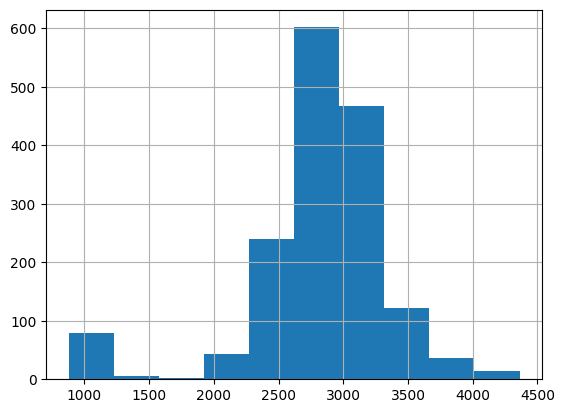

In [43]:
df['y'].hist()

In [79]:
with open('../../../data/ficzurs_koefiszietns.json', 'r') as fh:
	res: dict[str, str] = json.load(fh)
def sanitize(text: str):
	return (text
	 .replace('populacja - procentowe kategorie wiekowe od ', '')
	 .replace(' lat', '')
	 .replace('populacja - kategorie wiekowe od ', '')
	 .replace('populacja - procent kategorii wiekowych od ', '')
	 .replace('populacja - procent kategorii wiekowych ', '')
	 .replace('liczba punktów ', '')
	 .replace('w metrach do najbliższego POI (-1 = większy niż 5000 m) - ', '')
	 .replace('w metrach do najbliższego POI (-1 = większa niż 5000 m) - ', '')
	 .replace('w metrach do najbliższego POI (-1 = większy niż 5000 m) - ', '')
	 .replace('w metrach do najbliższego POI (-1 = więcej niż 5000 m) - ', '')
	 .replace('w metrach do najbliższego punktu POI (-1 = większy niż 5000 m) - ', '')
	 .replace('w metrach do najbliższego POI (-1 = większy niż 5000 m) - ', '')
	 .replace('w metrach do najbliższego punktu POI (-1 = większa niż 5000 m) - ', '')
	 .replace('w metrach do najbliższego POI (-1 = większe niż 5000 m) - ', '')
	 .replace('w metrach do najbliższego punktu POI (-1 = większa niż 5000 m) - ', '')
	 )

df=pd.DataFrame(pd.DataFrame(list({sanitize(k): v for k,v in res.items()}.items()), columns=['key', 'val']), index=range(len(res))).dropna()
# df_filer=df['key'].str.contains(r'^\d+ do \d+$|powyżej \d+', regex=True)
# df[df_filer].set_index('key').to_dict()['val'].keys()
po_df_filter=df['key'].str.contains(r'^POI', regex=True)

df[po_df_filter][['POI - wykształcenie wyższe / uniwersytet', 'POI - rozrywka i kult', 'POI - suma zdrowia', 'POI - szkoła średnia']]

,key,val
30,POI - ogółem,-0.000492
31,POI - bankomat (bankomat),0.000077
32,POI - oddział banku,0.000690
33,POI - centrum handlowe (centrum handlowe),-0.000089
34,POI - kategoria edukacji ogółem,-0.000654
35,POI - przedszkole edukacyjne,-0.000815
36,POI - edukacja szkoła podstawowa,0.000155
37,POI - szkoła średnia,0.000776
38,POI - wykształcenie wyższe / uniwersytet,-0.000743
39,POI - suma detaliczna,0.000450


In [67]:
df['key']

0                             liczba budynków – suma
1                     liczba budynków - mieszkalnych
2     liczba mieszkań - mieszkalnych według DataWise
3                 szacowana liczba mieszkańców razem
4         średnia liczba osób na gospodarstwo domowe
                           ...                      
81                                               NaN
82                                               NaN
83                                               NaN
84                                               NaN
85                                               NaN
Name: key, Length: 86, dtype: object